# Exploratory Data Analysis

### import requirements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import statistics

### load datasets

In [2]:
df1 = pd.read_csv('ecommerce/olist_customers_dataset.csv')
df1.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


In [3]:
df1.shape

(99441, 5)

In [4]:
df1['customer_unique_id'].value_counts()

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
6469f99c1f9dfae7733b25662e7f1782     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
                                    ..
66094cc32cdac22a0a768c903b4a08bb     1
b814fa64605cc425160403d78fb75f4c     1
c0c8ceabbd1c35c83790ae67b0684d6c     1
a48d5ca50a8523fb01af7d907947781b     1
21374af3df5985c2b10620a6b8c71542     1
Name: customer_unique_id, Length: 96096, dtype: int64

In [5]:
df1['customer_zip_code_prefix'].value_counts()

22790    142
24220    124
22793    121
24230    117
22775    110
        ... 
59820      1
47590      1
56313      1
44023      1
39113      1
Name: customer_zip_code_prefix, Length: 14994, dtype: int64

In [6]:
df1['customer_city'].value_counts()

sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
                         ...  
engenheiro balduino          1
felipe guerra                1
gramado dos loureiros        1
unistalda                    1
capela nova                  1
Name: customer_city, Length: 4119, dtype: int64

We have around `100,000` customers from `4,000+` cities.

In [7]:
df2 = pd.read_csv('ecommerce/olist_sellers_dataset.csv')
df2.head(1)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP


In [8]:
df2.shape

(3095, 4)

In [9]:
df2['seller_city'].value_counts()

sao paulo             694
curitiba              127
rio de janeiro         96
belo horizonte         68
ribeirao preto         52
                     ... 
presidente getulio      1
alvares machado         1
pedro leopoldo          1
mamanguape              1
macatuba                1
Name: seller_city, Length: 611, dtype: int64

We have around `3,000` sellers from `600+` cities.

In [10]:
df3 = pd.read_csv('ecommerce/olist_products_dataset.csv')
df3.head(1)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0


In [11]:
df3.shape

(32951, 9)

In [12]:
df3['product_category_name'].value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
casa_conforto_2                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In [13]:
df4 = pd.read_csv('ecommerce/olist_orders_dataset.csv', parse_dates=True)
df4.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [14]:
df4.shape

(99441, 8)

In [15]:
d1 = df4['order_purchase_timestamp'].min()
d1

'2016-09-04 21:15:19'

In [16]:
d2 = df4['order_purchase_timestamp'].max()
d2

'2018-10-17 17:30:18'

In [17]:
d1 = datetime.strptime(d1, "%Y-%m-%d %H:%M:%S")
d2 = datetime.strptime(d2, "%Y-%m-%d %H:%M:%S")
(d2 - d1).days

772

In [18]:
df5 = pd.read_csv('ecommerce/olist_order_items_dataset.csv')
df5.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [19]:
df5.shape

(112650, 7)

In [20]:
df6 = df5.merge(df4, how='outer', on='order_id')
df6.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00


In [21]:
df6.shape

(113425, 14)

In [22]:
df6['customer_id'].value_counts()

fc3d1daec319d62d49bfb5e1f83123e9    21
bd5d39761aa56689a265d95d8d32b8be    20
be1b70680b9f9694d8c70f41fa3dc92b    20
10de381f8a8d23fff822753305f71cae    15
adb32467ecc74b53576d9d13a5a55891    15
                                    ..
8407856064f21b0b4502e7722f213577     1
b1d1ede48fb8245ecb50d744ecd46068     1
9f65cd05b72a07d989c5d1761c5cd9ca     1
a6961dc03f1ee1b29e69263585968776     1
8fe0db7abbccaf2d788689e918e3135b     1
Name: customer_id, Length: 99441, dtype: int64

In [23]:
purchase_frequency = dict(df6['customer_id'].value_counts())
statistics.mean(list(purchase_frequency.values()))

1

In [24]:
statistics.median(list(purchase_frequency.values()))

1

In [25]:
statistics.mode(list(purchase_frequency.values()))

1

(array([9.7154e+04, 1.8270e+03, 4.0200e+02, 3.0000e+01, 1.1000e+01,
        9.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.]),
 <a list of 10 Patch objects>)

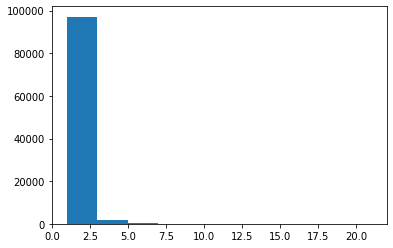

In [26]:
plt.hist(list(purchase_frequency.values()))